----
## Step 2: Minimum Viable Architecture

Here we test our Keras installation with a minimum viable convolutional neural network.

In [1]:
from os import chdir; chdir('..')

### Load a precompiled minimal data dictionary

We have put together a small dummy dataset for demonstration purposes. You can load this set with the following code.

In [2]:
from lib.data import load_dataset
minimal_data_dictionary = load_dataset('data/minimal_data_dictionary.pickle')

Loading pickled data...


In [3]:
print("train_set shape: {}".format(minimal_data_dictionary['train_set'].shape))
print("train samples: {}".format(minimal_data_dictionary['train_set'].shape[0]))
print("test samples: {}".format(minimal_data_dictionary['test_set'].shape[0]))

train_set shape: (50, 64, 64, 1)
train samples: 50
test samples: 5


### Import libraries neccessary to construct a single-layer model

In [4]:
from keras.models import Sequential
from keras.layers import Convolution2D, Dense, Activation, Flatten
from keras.utils.visualize_util import model_to_dot

from numpy.random import seed
seed(1337)

Using TensorFlow backend.


Using these basic tools we can do a simple training on our minimal dataset

In [5]:
batch_size = 5
nb_classes = 10
nb_epoch = 10
nb_filters = 64
image_shape = minimal_data_dictionary['train_set'].shape[1:]

### Define a Simple Model using the `Sequential` class

First, we use the [`Sequential`][sequential] class to define a single layer convolutional neural network.

[sequential]: https://keras.io/getting-started/sequential-model-guide/

In [6]:
model = Sequential([
    Convolution2D(*image_shape, border_mode='same', input_shape=image_shape),
    Activation('relu'),
    Flatten(),
    Dense(54),
    Activation('softmax')
])

### Compile the defined model for training

Next, we [compile](https://keras.io/getting-started/sequential-model-guide/#compilation) the model we have defined. 

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='sgd')

### Train the Model using our compiled model

We [train](https://keras.io/getting-started/sequential-model-guide/#training) the model.

In [15]:
minimal_data_dictionary['train_set'].shape,\
minimal_data_dictionary['train_labels'].shape, \
minimal_data_dictionary['valid_set'].shape, \
minimal_data_dictionary['valid_labels'].shape

((50, 64, 64, 1), (50, 54), (5, 64, 64, 1), (5, 54))

In [8]:
history = model.fit(minimal_data_dictionary['train_set'], 
                    minimal_data_dictionary['train_labels'],
                    batch_size=batch_size,
                    nb_epoch=2,       
                    shuffle=True,
                    validation_data=(minimal_data_dictionary['valid_set'],
                                     minimal_data_dictionary['valid_labels']))

Train on 50 samples, validate on 5 samples
Epoch 1/2
50/50 [==============================] - 1s - loss: 68.3560 - val_loss: 70.9196
Epoch 2/2
50/50 [==============================] - 1s - loss: 69.3078 - val_loss: 70.9196 - ETA: 0s - loss: 66.6215

### Plot Batch Loss Against Validation Loss

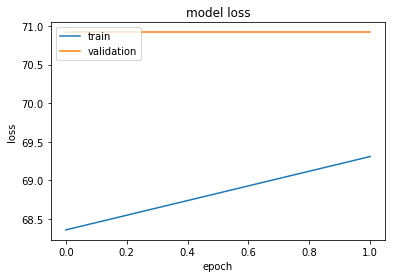

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

### Evaluate the Fit Model

In [10]:
model.evaluate(minimal_data_dictionary['test_set'],
               minimal_data_dictionary['test_labels'])

5/5 [==============================] - 0s


67.695999145507812

We define our CNN to have the following layers:

- [Convolution2D][c2d] 
  - because this is the first layer in our network, we must define the `input_shape`
- [Activation][act]
  - applies an activation function to an input, here a `relu`
- [Flatten][flt]
  - flatten an input into a 1-tensor (a vector)
- [Dense][dns]
  - a standard neural network node, we use it here to define the shape of our output
- Activation
  - a final output layer to be trained under a cross-entropy regime
  
[c2d]: https://keras.io/layers/convolutional/#convolution2d
[act]: https://keras.io/layers/core/#activation
[flt]: https://keras.io/layers/core/#flatten
[dns]: https://keras.io/layers/core/#dense


### Display a Summary of your Model

In [11]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 64, 64, 64)    4160        convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 64, 64, 64)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
flatten_1 (Flatten)              (None, 262144)        0           activation_1[0][0]               
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 54)            14155830    flatten_1[0][0]                  
___________________________________________________________________________________________

### Visualize Model with `pydot` and `graphviz`

If you have [`graphviz`][graphviz] and [`pydot`][pydot] installed, you can use them to visualize your model.

[graphviz]: http://www.graphviz.org
[pydot]: https://github.com/erocarrera/pydot

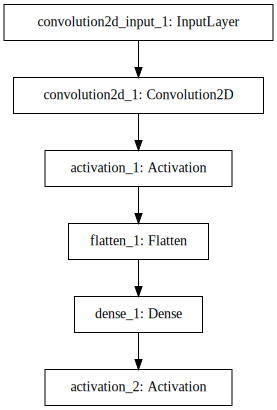

In [12]:
from IPython.display import SVG
SVG(model_to_dot(model).create(prog='dot', format='svg'))